# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from citipy import citipy
from api_keys import weather_api_key
from scipy.stats import linregress
import scipy.stats as st


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Seed the random number generator for reproducibility
# np.random.seed(123)

# Create a set of random lat and lng combinations

lattitude = np.random.uniform(-90,90,size=1500)
longitude = np.random.uniform(-180,180,size=1500)
lat_lon = list(zip (lattitude,longitude))

# Identify nearest city for each lat, lng combination
city = [citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name for lat_lon in lat_lon]
print (f"Number of cities in the list: {len (city)}")
print (city)

Number of cities in the list: 1500
['san andres', 'bilibino', 'longyearbyen', 'aasiaat', 'port isabel', 'cockburn town', 'michendorf', 'ushuaia', 'leava', 'katsuren-haebaru', 'isafjordur', 'guerrero negro', 'inarajan village', 'stanley', 'yellowknife', 'longyearbyen', 'longyearbyen', 'vila franca do campo', 'waitangi', 'tiksi', 'afaahiti', 'waitangi', 'pierre', 'jamestown', 'paracuru', 'blackmans bay', 'adamstown', 'puerto ayora', 'perelyub', 'port lincoln', 'port mathurin', 'ushuaia', 'ad dilam', 'neiafu', 'dhidhdhoo', 'awjilah', 'grytviken', 'port lincoln', 'hermanus', 'bredasdorp', 'cassilandia', 'broome', 'albany', 'zahedan', 'kargasok', 'nelson bay', 'talnakh', 'port-aux-francais', 'usogorsk', 'yellowknife', 'samho-rodongjagu', 'grytviken', 'hawaiian paradise park', 'afaahiti', 'ta`u', 'grytviken', 'vorkuta', 'adamstown', 'papatowai', 'ilulissat', 'waitangi', 'lebu', 'waitangi', 'uturoa', 'wynyard', 'la tuque', 'qaqortoq', "st. john's", 'bethel', 'new norfolk', 'mirny', 'tsiombe',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
city_df = pd.DataFrame(city)
city_df = city_df.rename(columns={0:"City"})
city_df.head(20)

,City
0,san andres
1,bilibino
2,longyearbyen
3,aasiaat
4,port isabel
5,cockburn town
6,michendorf
7,ushuaia
8,leava
9,katsuren-haebaru


In [4]:
city_df["Longitude"]=""
city_df["Latitude"]=""
city_df["Max Temp"]=""
city_df["Humidity"]=""
city_df["Cloudiness"]=""
city_df["Wind Speed"]=""
city_df["Country"]=""
city_df["Date"]=""
city_df.head(20)

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san andres,,,,,,,,
1,bilibino,,,,,,,,
2,longyearbyen,,,,,,,,
3,aasiaat,,,,,,,,
4,port isabel,,,,,,,,
5,cockburn town,,,,,,,,
6,michendorf,,,,,,,,
7,ushuaia,,,,,,,,
8,leava,,,,,,,,
9,katsuren-haebaru,,,,,,,,


In [5]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "appid":weather_api_key,
    "units":"metric"
}


# Create counters
record_count = 1
set_count = 1

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


for i, row in city_df.iterrows():
    city_name = city_df.loc[i,"City"]
    params["q"]=f"{city_name}"
    response = requests.get(base_url, params=params).json()
    
    try:
        city_df.loc[i,"Longitude"] = response["coord"]["lon"]
        city_df.loc[i,"Latitude"] = response["coord"]["lat"]
        city_df.loc[i,"Max Temp"] = response["main"]["temp_max"]
        city_df.loc[i,"Humidity"] = response["main"]["humidity"]
        city_df.loc[i,"Cloudiness"] = response["clouds"]["all"]
        city_df.loc[i,"Wind Speed"] = response["wind"]["speed"]
        city_df.loc[i,"Country"] = response["sys"]["country"]
        city_df.loc[i,"Date"] = response["dt"]
    # Broaden the exception handling to catch any exception
    except Exception as e: 
        # Print the error message
        print(f"Error processing {city_name}: {e.args[0]} not found")  
        city_df.loc[i, ["City", "Country"]] = None
        city_df.loc[i, ["Longitude", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]] = float("nan")
        pass

    # Print a message for every city processed
    print(f"Processing Record {record_count} of Set {set_count} | {city_name}")
    
    # Update the record and set counts
    record_count += 1
    if record_count > 50:
        record_count = 1
        set_count += 1

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san andres
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | port isabel
Processing Record 6 of Set 1 | cockburn town
Processing Record 7 of Set 1 | michendorf
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | leava
Processing Record 10 of Set 1 | katsuren-haebaru
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | inarajan village
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | afaahiti
Processing Record 22 of Set 1 | wa

In [6]:
city_df = city_df.dropna()
city_df.reset_index(drop=True,inplace=True)
city_df.count()

City          1443
Longitude     1443
Latitude      1443
Max Temp      1443
Humidity      1443
Cloudiness    1443
Wind Speed    1443
Country       1443
Date          1443
dtype: int64

In [12]:
# Drop duplicated rows based on specified columns
city_df = city_df.drop_duplicates(subset=["Latitude", "Longitude", "City", "Country"], keep="first")

# Reset the index after dropping duplicated rows
city_df.reset_index(drop=True, inplace=True)

# The count of non-null values in each column
city_df.count()


City          577
Longitude     577
Latitude      577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [13]:
# Display sample data
city_df.head(20)

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san andres,-81.7006,12.5847,27.01,83,20,3.6,CO,1707795784
1,bilibino,166.4372,68.0546,-29.9,96,91,1.5,RU,1707795784
2,longyearbyen,15.6401,78.2186,-11.09,79,0,0.51,SJ,1707795784
3,aasiaat,-52.8699,68.7098,-29.8,97,57,3.12,GL,1707795690
4,port isabel,-97.2086,26.0734,16.68,66,0,2.68,US,1707795785
5,cockburn town,-71.1419,21.4612,25.27,76,0,8.81,TC,1707795785
6,michendorf,13.0257,52.3012,5.54,92,13,4.02,DE,1707795785
7,ushuaia,-68.3,-54.8,8.81,71,0,1.54,AR,1707795785
8,leava,-178.1667,-14.3,28.94,81,100,7.34,WF,1707795785
9,katsuren-haebaru,127.8719,26.3369,23.43,46,0,6.69,JP,1707795785


In [14]:
# Export the City_Data into a csv
city_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_df.head()

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san andres,-81.7006,12.5847,27.01,83,20,3.60,CO,1707795784
1,bilibino,166.4372,68.0546,-29.90,96,91,1.50,RU,1707795784
2,longyearbyen,15.6401,78.2186,-11.09,79,0,0.51,SJ,1707795784
3,aasiaat,-52.8699,68.7098,-29.80,97,57,3.12,GL,1707795690
4,port isabel,-97.2086,26.0734,16.68,66,0,2.68,US,1707795785


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

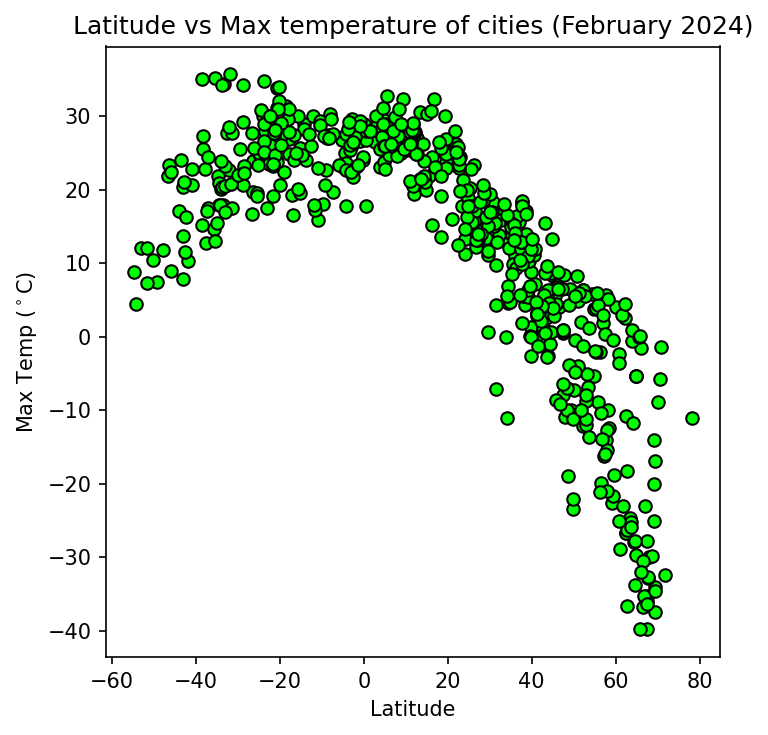

In [16]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(5,5),dpi = 150)
plt.scatter(city_df["Latitude"],city_df["Max Temp"], facecolor="lime",edgecolor="k")
plt.xlabel("Latitude")
plt.ylabel("Max Temp ($^\circ$C)")
plt.title('Latitude vs Max temperature of cities (February 2024)')
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Figure1.tif")

# Show plot
plt.show()

#### Latitude Vs. Humidity

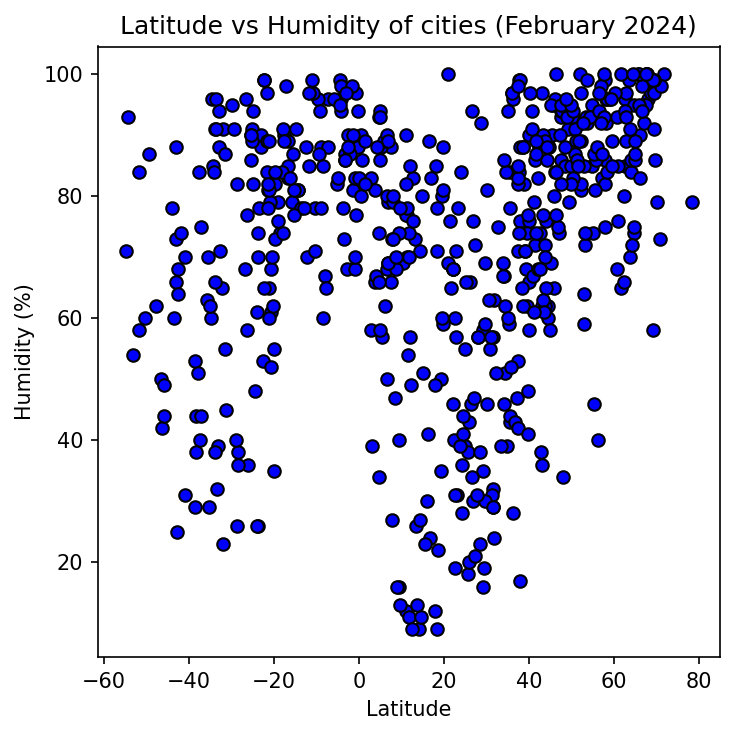

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(5,5),dpi = 150)
plt.scatter(city_df["Latitude"],city_df["Humidity"], facecolor="blue",edgecolor="k")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Latitude vs Humidity of cities (February 2024)')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Figure2.tif")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

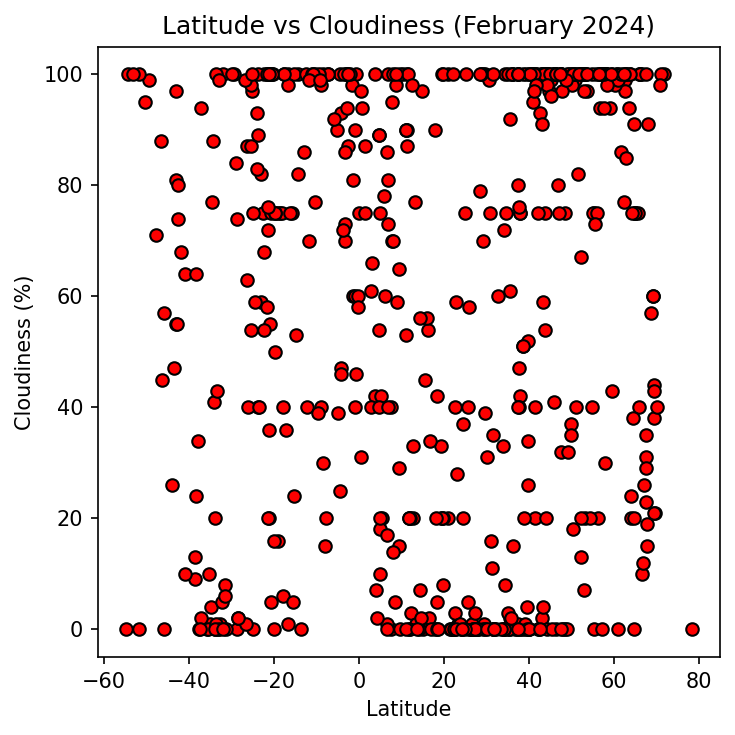

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(5,5),dpi = 150)
plt.scatter(city_df["Latitude"],city_df["Cloudiness"], facecolor="red",edgecolor="k")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Latitude vs Cloudiness (February 2024)')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Figure3.tif")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

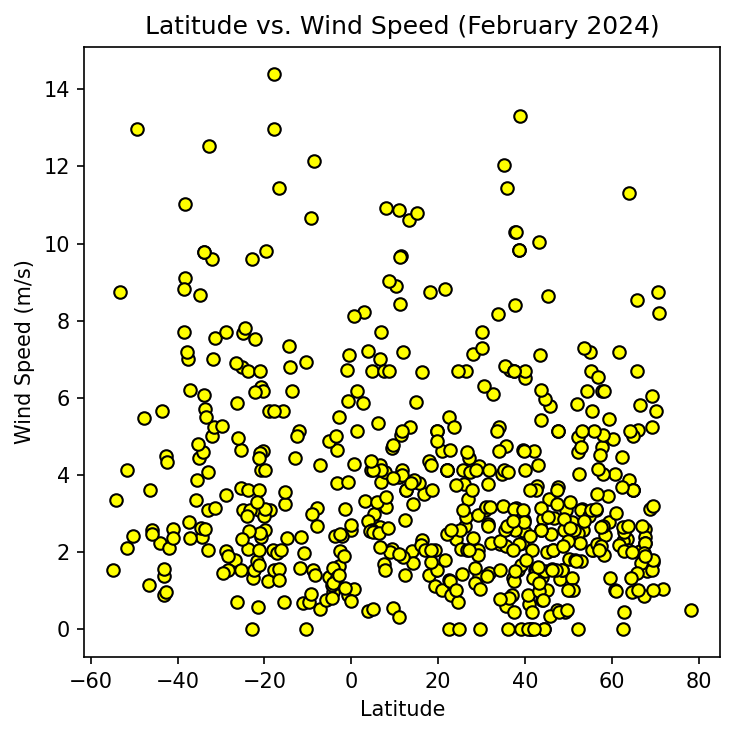

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(5,5),dpi = 150)
plt.scatter(city_df["Latitude"],city_df["Wind Speed"], facecolor="yellow",edgecolor="k")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title('Latitude vs. Wind Speed (February 2024)')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Figure4.tif")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
def regression_plot(x_values, y_values,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    x_pos = x_values.min() 
    y_pos = y_values.min() 
    plt.text(x_pos, y_pos, line_eq, fontsize=12, color="red")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.title (f"{y_values.name} vs {x_values.name}")
    plt.savefig (f"../output_data/{filename}")
    plt.show()

In [59]:
def correlation_plot (x_values, y_values):
    correlation = st.pearsonr(x_values, y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_df.loc[city_df["Latitude"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san andres,-81.7006,12.5847,27.01,83,20,3.60,CO,1707795784
1,bilibino,166.4372,68.0546,-29.90,96,91,1.50,RU,1707795784
2,longyearbyen,15.6401,78.2186,-11.09,79,0,0.51,SJ,1707795784
3,aasiaat,-52.8699,68.7098,-29.80,97,57,3.12,GL,1707795690
4,port isabel,-97.2086,26.0734,16.68,66,0,2.68,US,1707795785


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_df.loc[city_df["Latitude"]<0]
# Display sample data
southern_hemi_df.head()

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,ushuaia,-68.3000,-54.8000,8.81,71,0,1.54,AR,1707795785
8,leava,-178.1667,-14.3000,28.94,81,100,7.34,WF,1707795785
16,waitangi,-176.5597,-43.9535,17.12,78,26,2.24,NZ,1707795629
18,afaahiti,-149.2833,-17.7500,26.93,90,100,12.96,PF,1707795787
21,paracuru,-39.0306,-3.4100,28.95,86,73,4.65,BR,1707795788


###  Temperature vs. Latitude Linear Regression Plot

The correlation between both factors is -0.89


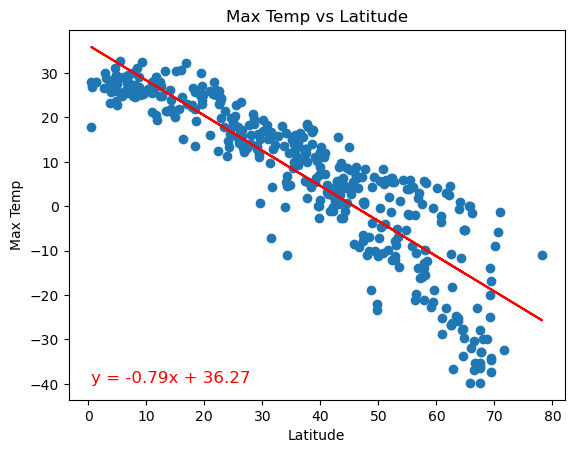

In [62]:
# Linear regression on Northern Hemisphere
correlation_plot (northern_hemi_df["Latitude"], northern_hemi_df["Max Temp"])
regression_plot(northern_hemi_df["Latitude"], northern_hemi_df["Max Temp"],"fig_TN1.png")

** Discussion about the linear relationship: 

There is a strong negative correlation between temperature and latitude; as latitude increases (moving northwards), temperature tends to decrease. The slope of the line indicates the rate of change in temperature for each unit increase in latitude, and since the slope is negative, it confirms the negative correlation observed. We can infer that as one moves towards higher latitudes (further north in the Northern Hemisphere), temperatures tend to decrease.

The correlation between both factors is 0.5


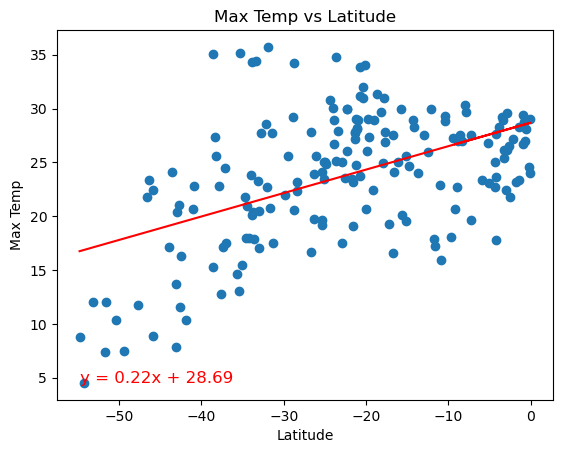

In [63]:
# Linear regression on Southern Hemisphere
correlation_plot (southern_hemi_df["Latitude"], southern_hemi_df["Max Temp"])
regression_plot(southern_hemi_df["Latitude"], southern_hemi_df["Max Temp"],"fig_TS2.png")

**Discussion about the linear relationship:

There is a moderate relationship between temperature and latitude in the southern hemisphere, suggesting temperatures  decreasing as one moves farther away from the equator towards the pole.

In summary, these findings suggest that there is a relationship between latitude and temperature in both hemispheres, with opposite trends. In the Northern Hemisphere, temperatures tend to decrease as latitude increases, while in the Southern Hemisphere, temperatures tend to increase as latitude increases.


### Humidity vs. Latitude Linear Regression Plot

The correlation between both factors is 0.47


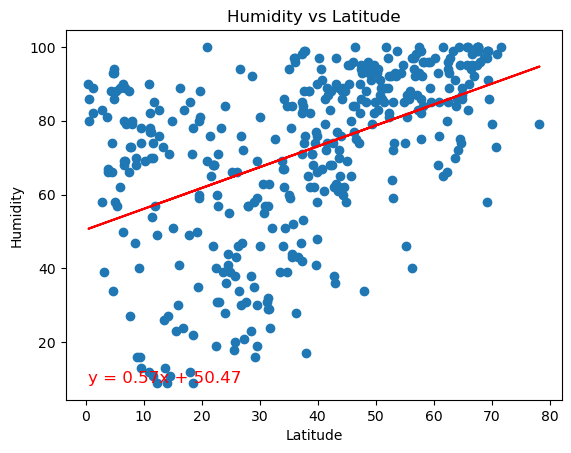

In [64]:
# Northern Hemisphere
correlation_plot (northern_hemi_df["Latitude"], northern_hemi_df["Humidity"])
regression_plot(northern_hemi_df["Latitude"], northern_hemi_df["Humidity"],"fig_HN3.png")

** Discussion about the linear relationship:

These findings suggest that there is a moderate positive relationship between Latitude and Humidity in the Northern Hemisphere, with Humidity generally increasing as Latitude increases. 

The correlation between both factors is 0.45


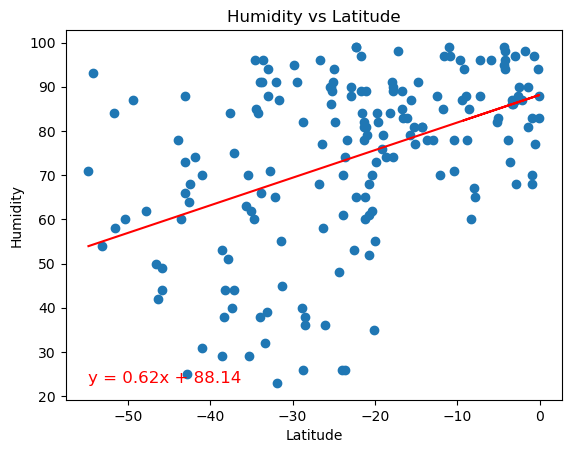

In [65]:
# Southern Hemisphere
correlation_plot (southern_hemi_df["Latitude"], southern_hemi_df["Humidity"])
regression_plot(southern_hemi_df["Latitude"], southern_hemi_df["Humidity"],"fig_HS4.png")

**Discussion about the linear relationship:

In summary, there's a moderate positive relationship between humidity and latitude in both Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between both factors is 0.26


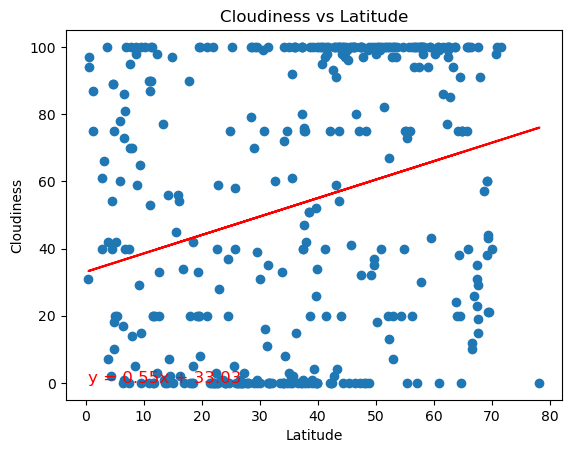

In [66]:
# Northern Hemisphere
correlation_plot (northern_hemi_df["Latitude"], northern_hemi_df["Cloudiness"])
regression_plot(northern_hemi_df["Latitude"], northern_hemi_df["Cloudiness"],"fig_CN5.png")

The correlation between both factors is 0.28


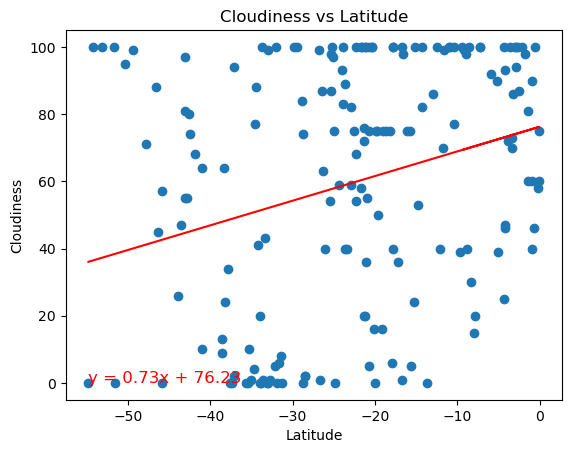

In [67]:
# Southern Hemisphere
correlation_plot (southern_hemi_df["Latitude"], southern_hemi_df["Cloudiness"])
regression_plot(southern_hemi_df["Latitude"], southern_hemi_df["Cloudiness"],"fig_CS6.png")

**Discussion about the linear relationship:

Overall, the information suggests that there is a weak positive relationship between cloudiness and latitude in both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between both factors is -0.14


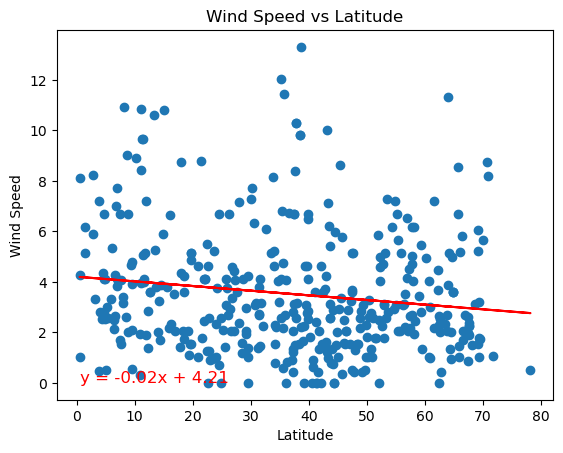

In [68]:
# Northern Hemisphere
correlation_plot (northern_hemi_df["Latitude"], northern_hemi_df["Wind Speed"])
regression_plot(northern_hemi_df["Latitude"], northern_hemi_df["Wind Speed"],"fig_WN7.png")

The correlation between both factors is -0.18


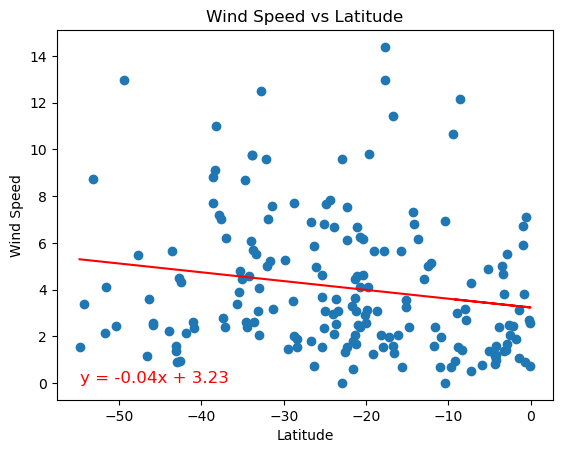

In [69]:
# Southern Hemisphere
correlation_plot (southern_hemi_df["Latitude"], southern_hemi_df["Wind Speed"])
regression_plot(southern_hemi_df["Latitude"], southern_hemi_df["Wind Speed"],"fig_WS8.png")

**Discussion about the linear relationship:

Overall, there is a weak negative linear relationship between wind speed and latitude in both hemispheres.



